In [4]:
# install lib with anaconda cmd promt env enabled

In [6]:
import pandas as pd

In [6]:
import numpy as np

In [3]:
import pickle  # save a machine learning model    another lib:joblib

In [7]:
df =pd.read_csv('kc_house_data.csv')

In [11]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          1180.0              0      1955             0    98178  47.5112   
1          2170.0            400      1951          1991    98125  47.7210   
2           770.0              0      1933             0    98028  47.7379   
3          1050.0            910      1965             0    98136  47.5208   
4          1680.0              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608      1530.0              0      2009             0    98103  47.6993   
21609      2310.0              0      2014             0    98146  47.5107   
21610      1020.0              0      2009             0    98144  47.5944   
21611      1600.0              0      2004             0    98027  47.5345   
21612      1020.0              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
len(df)  # 21613 --only 2 values are null --drop them #not good way to drop replace it with mean median mode etc

21613

In [15]:
df.dropna(inplace=True)

In [16]:
len(df) 

21611

In [17]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [19]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161100e+04  2.161100e+04  21611.000000  21611.000000  21611.000000   
mean   4.580327e+09  5.400850e+05      3.370830      2.114791   2079.853454   
std    2.876592e+09  3.671430e+05      0.930092      0.770157    918.422406   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.217250e+05      3.000000      1.750000   1426.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161100e+04  21611.000000  21611.000000  21611.000000  21611.000000   
mean   1.510771e+04      1.494332      0.007542      0.234325      3.409421   
std    4.142235e+04      0.540003      0.086521      0.766350      0.650755   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068850e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21611.000000  21611.000000   21611.000000  21611.000000  21611.000000   
mean       7.656888   1788.396095     291.457360   1971.007959     84.410069   
std        1.175502    828.128162     442.487355     29.372358    401.697007   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21611.000000  21611.000000  21611.000000   21611.000000   21611.000000  
mean   98077.941928     47.560046   -122.213894    1986.559576   12769.025357  
std       53.505054      0.138568      0.140831     685.416548   27305.369808  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.470950   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.500000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [20]:
label = df['price']

In [22]:
label #y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21611, dtype: float64

In [8]:
train =df.drop(['id','price','date'],axis=1)

In [24]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#correlation --- 1 value increase with other value,1value decr wrt other --negative corr ,, 0 corr: 

In [ ]:
# myth -- correlation does not imply causation

In [26]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016742  0.001243   0.005237    -0.012166 -0.132110   
price         -0.016742  1.000000  0.308366   0.525150     0.702055  0.089661   
bedrooms       0.001243  0.308366  1.000000   0.515974     0.576763  0.031710   
bathrooms      0.005237  0.525150  0.515974   1.000000     0.754684  0.087730   
sqft_living   -0.012166  0.702055  0.576763   0.754684     1.000000  0.172841   
sqft_lot      -0.132110  0.089661  0.031710   0.087730     0.172841  1.000000   
floors         0.018484  0.256814  0.175418   0.500712     0.354048 -0.005206   
waterfront    -0.002722  0.266371 -0.006581   0.063743     0.103829  0.021602   
view           0.011590  0.397299  0.079537   0.187735     0.284647  0.074705   
condition     -0.023846  0.036379  0.028433  -0.124917    -0.058689 -0.008951   
grade          0.008165  0.667434  0.356998   0.664981     0.762727  0.113617   
sqft_above    -0.010830  0.605567  0.477616   0.685363     0.876644  0.183511   
sqft_basement -0.004983  0.323842  0.303251   0.283737     0.434925  0.015301   
yr_built       0.021442  0.054006  0.154248   0.505968     0.318066  0.053061   
yr_renovated  -0.016910  0.126436  0.018844   0.050733     0.055377  0.007640   
zipcode       -0.008303 -0.053182 -0.152717  -0.203825    -0.199342 -0.129583   
lat           -0.001905  0.307010 -0.008950   0.024619     0.052530 -0.085673   
long           0.020856  0.021613  0.129516   0.222987     0.240187  0.229519   
sqft_living15 -0.002866  0.585377  0.391670   0.568626     0.756440  0.144605   
sqft_lot15    -0.138798  0.082448  0.029252   0.087163     0.183301  0.718556   

                 floors  waterfront      view  condition     grade  \
id             0.018484   -0.002722  0.011590  -0.023846  0.008165   
price          0.256814    0.266371  0.397299   0.036379  0.667434   
bedrooms       0.175418   -0.006581  0.079537   0.028433  0.356998   
bathrooms      0.500712    0.063743  0.187735  -0.124917  0.664981   
sqft_living    0.354048    0.103829  0.284647  -0.058689  0.762727   
sqft_lot      -0.005206    0.021602  0.074705  -0.008951  0.113617   
floors         1.000000    0.023695  0.029432  -0.263808  0.458208   
waterfront     0.023695    1.000000  0.401857   0.016655  0.082775   
view           0.029432    0.401857  1.000000   0.045995  0.251320   
condition     -0.263808    0.016655  0.045995   1.000000 -0.144647   
grade          0.458208    0.082775  0.251320  -0.144647  1.000000   
sqft_above     0.523899    0.072074  0.167648  -0.158206  0.755924   
sqft_basement -0.245634    0.080618  0.277051   0.174273  0.168375   
yr_built       0.489361   -0.026172 -0.053474  -0.361384  0.446958   
yr_renovated   0.006330    0.092883  0.103912  -0.060617  0.014412   
zipcode       -0.059181    0.030283  0.084819   0.002967 -0.184842   
lat            0.049628   -0.014270  0.006172  -0.014965  0.114102   
long           0.125446   -0.041913 -0.078408  -0.106453  0.198349   
sqft_living15  0.279907    0.086463  0.280440  -0.092795  0.713197   
sqft_lot15    -0.011275    0.030702  0.072569  -0.003397  0.119243   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010830      -0.004983  0.021442     -0.016910 -0.008303   
price            0.605567       0.323842  0.054006      0.126436 -0.053182   
bedrooms         0.477616       0.303251  0.154248      0.018844 -0.152717   
bathrooms        0.685363       0.283737  0.505968      0.050733 -0.203825   
sqft_living      0.876644       0.434925  0.318066      0.055377 -0.199342   
sqft_lot         0.183511       0.015301  0.053061      0.007640 -0.129583   
floors           0.523899      -0.245634  0.489361      0.006330 -0.059181   
waterfront       0.072074       0.080618 -0.026172      0.092883  0.030283   
view             0.167648       0.277051 -0.053474      0.103912  0.084819   
condition       -0.158206       0.174273 -0.361384     -0.060617  0.

In [28]:
corrmat =df.corr()
top_corr_feature =corrmat.index
top_corr_feature

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [33]:
top_corr_feature =corrmat.index

In [34]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

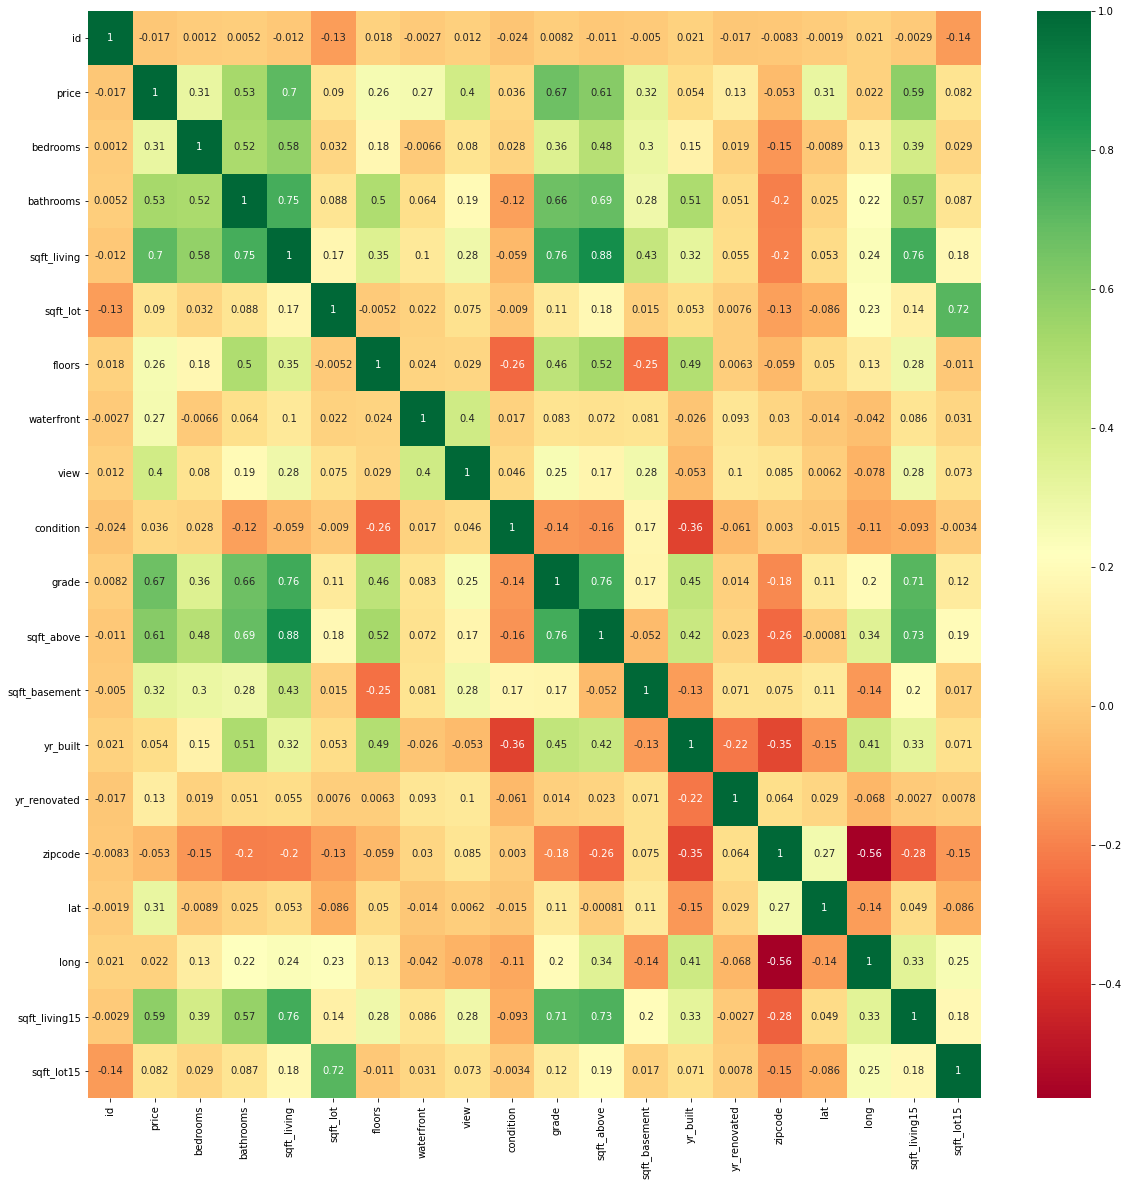

In [39]:
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [43]:
label

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21611, dtype: float64

In [44]:
from sklearn.ensemble import ExtraTreesRegressor  #  build a model do prediction give which variable is impacting our depd more
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(train,label)  # traning model

ExtraTreesRegressor()

In [45]:
model.feature_importances_

array([0.00813804, 0.04446855, 0.18634499, 0.01222097, 0.00726725,
       0.04145581, 0.03717764, 0.01041151, 0.23406617, 0.06502323,
       0.01219421, 0.0349077 , 0.0061347 , 0.02008075, 0.13606422,
       0.04697099, 0.08533323, 0.01174004])

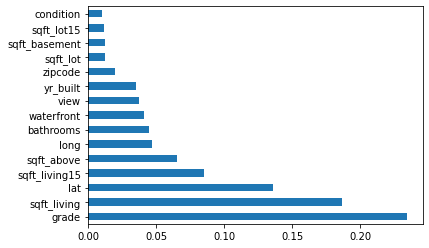

In [48]:
feat_importances = pd.Series(model.feature_importances_, index=train.columns)

feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [50]:
col_imp =['grade','lat','long','sqft_living','waterfront','yr_built']

In [52]:
train[col_imp]

grade      lat     long  sqft_living  waterfront  yr_built
0          7  47.5112 -122.257         1180           0      1955
1          7  47.7210 -122.319         2570           0      1951
2          6  47.7379 -122.233          770           0      1933
3          7  47.5208 -122.393         1960           0      1965
4          8  47.6168 -122.045         1680           0      1987
...      ...      ...      ...          ...         ...       ...
21608      8  47.6993 -122.346         1530           0      2009
21609      8  47.5107 -122.362         2310           0      2014
21610      7  47.5944 -122.299         1020           0      2009
21611      8  47.5345 -122.069         1600           0      2004
21612      7  47.5941 -122.299         1020           0      2008

[21611 rows x 6 columns]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[col_imp], label, test_size=0.3, random_state=0)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
regressor =RandomForestRegressor(n_estimators=200)

In [58]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [59]:
#prediction
y_pred =regressor.predict(train[col_imp])

In [60]:
df['Predicted'] =y_pred

In [63]:
df[['price','Predicted']]

price      Predicted
0      221900.0  242236.575000
1      538000.0  486669.305000
2      180000.0  219099.500000
3      604000.0  565816.258333
4      510000.0  515647.950000
...         ...            ...
21608  360000.0  369231.667857
21609  400000.0  424716.900000
21610  402101.0  331184.880000
21611  400000.0  396746.160000
21612  325000.0  335697.260000

[21611 rows x 2 columns]

In [64]:
#rmse == for comparing the models of regression only ,...classification we obtain accuracy(google -confusion matrix)

In [65]:
from sklearn.metrics import mean_squared_error

from math import sqrt


In [66]:
rmse= sqrt(mean_squared_error(label,y_pred))

In [67]:
print(rmse)  # the lower the rmse value -->the better the model is

84554.58072593629


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
clf = GradientBoostingRegressor(n_estimators =200,max_depth=4,min_samples_split=2)  

In [76]:
# hyper parameter tuning : random search cv grid  (search on google )---fine tuning models

In [77]:
clf.fit(X_train,y_train)  

GradientBoostingRegressor(max_depth=4, n_estimators=200)

In [72]:
y_pred_grid = clf.predict(train[col_imp])#gb

In [73]:
rmse_grid= sqrt(mean_squared_error(label,y_pred_grid))

In [79]:
print(rmse)
print(rmse_grid)

84554.58072593629
116417.22216754379


In [80]:
#84554.58072593629
#116417.22216754379

In [81]:
# save model : random

In [82]:
pickle.dump(regressor,open('regression_model.pkl','wb'))  

In [84]:
pickle.dump(clf,open('Bossting_model.pkl','wb'))

In [85]:
# load model for future api

In [4]:
sandesh = pickle.load(open('regression_model.pkl','rb'))

In [5]:
y_loaded = sandesh.predict(train[col_imp])

NameError: name 'train' is not defined

In [88]:
y_loaded

array([242236.575, 486669.305, 219099.5  , ..., 331184.88 , 396746.16 ,
       335697.26 ])

In [ ]:
df

In [ ]:
#tomm : API part

In [3]:
from flask import Flask ,request,render_template 
import pickle  
import numpy as np

In [6]:
from flask import Flask ,request,render_template 
import pickle  
import numpy as np
app = Flask(__name__)
model = pickle.load(open('regression_model.pkl','rb'))
@app.route('/')
def home():
    return render_template('index.html')
@app.route('/predict',methods= ['POST'])
def predict():
    float_features = [float(x) for x in request.form.values()]  #list comphress  #[12,3,4,5]
    final_features =[np.array(float_features)]
    prediction = model.predict(final_features)
    print(prediction)
    
    output = round(prediction[0],2)
    
    return render_template('index.html',prediction_text="Predicted cost is $ {}:".format(output))
                           
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/May/2021 07:12:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2021 07:12:56] "GET /static/css/style.css HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2021 07:12:57] "GET /static/css/Home-Wallpaper-6.jpg HTTP/1.1" 304 -
127.0.0.1 - - [27/May/2021 07:13:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2021 07:13:04] "GET /static/css/style.css HTTP/1.1" 304 -


[781016.8025]


127.0.0.1 - - [27/May/2021 07:13:04] "GET /static/css/Home-Wallpaper-6.jpg HTTP/1.1" 304 -
